# Gender Neutrality and Inclusion:Amazon Case study (Jun 2021)
### Problem statement:
Company XYZ want to make a unbiased model irrespective of Employees Gender,Language of Commun. etc.Based on Some features we have to predict two features in this case study. first is BiasInfluentialFactor means based on which features employee will got selected in company i.e. whether employee HighestDegree or Latest CGPA etc and second is FitmentPercent features range between 0 to 100.this feature gives us information about what percentage individual employee fit in selected company.

## Steps that i did in this case study
First i drop Name and Empid column from train and test dataset coz there is no use

case 1: (drop FitmentPercent column cuz this variable i use in 2nd part as target)
- 1.First i Split train data into two parts first is which have not NAN value in BiasInfluentialFactor column and second which has NAN value
- 2.I have train classification model on train data which has no NAN value in target variable and fill those NAN value of remaining  train data using trained model
- 3. then again i train a model with whole dataset to predict test dataset BiasInfluentialFactor column 

case 2:
- 1. I have trained a regression model using some important independent variable 
- 2. predicted test data  FitmentPercent target variable using traind model


PS: As a Beginners I took the challenge solve and this problem and it's contain lots of mistake because i have taken all the independent variable of prediction(except two) and I have not use many feature selection techniques as well as different algorithms to train the model So take this solution as a Base Model and try to explore as much as possible 

sorry for bad english!!!

Good Luck!!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
pd.pandas.set_option('display.max_columns',None)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# Data Exploration

In [3]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [4]:
test.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9


In [5]:
print(train.shape,test.shape)

(13645, 22) (8745, 20)


In [6]:
train.isnull().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

There are null values in BiasInfluentialFactor in training dataset Rest all the data is clean


In [7]:
test.isnull().sum()

EmpID                      0
EmpName                    0
LanguageOfCommunication    0
Age                        0
Gender                     0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
dtype: int64

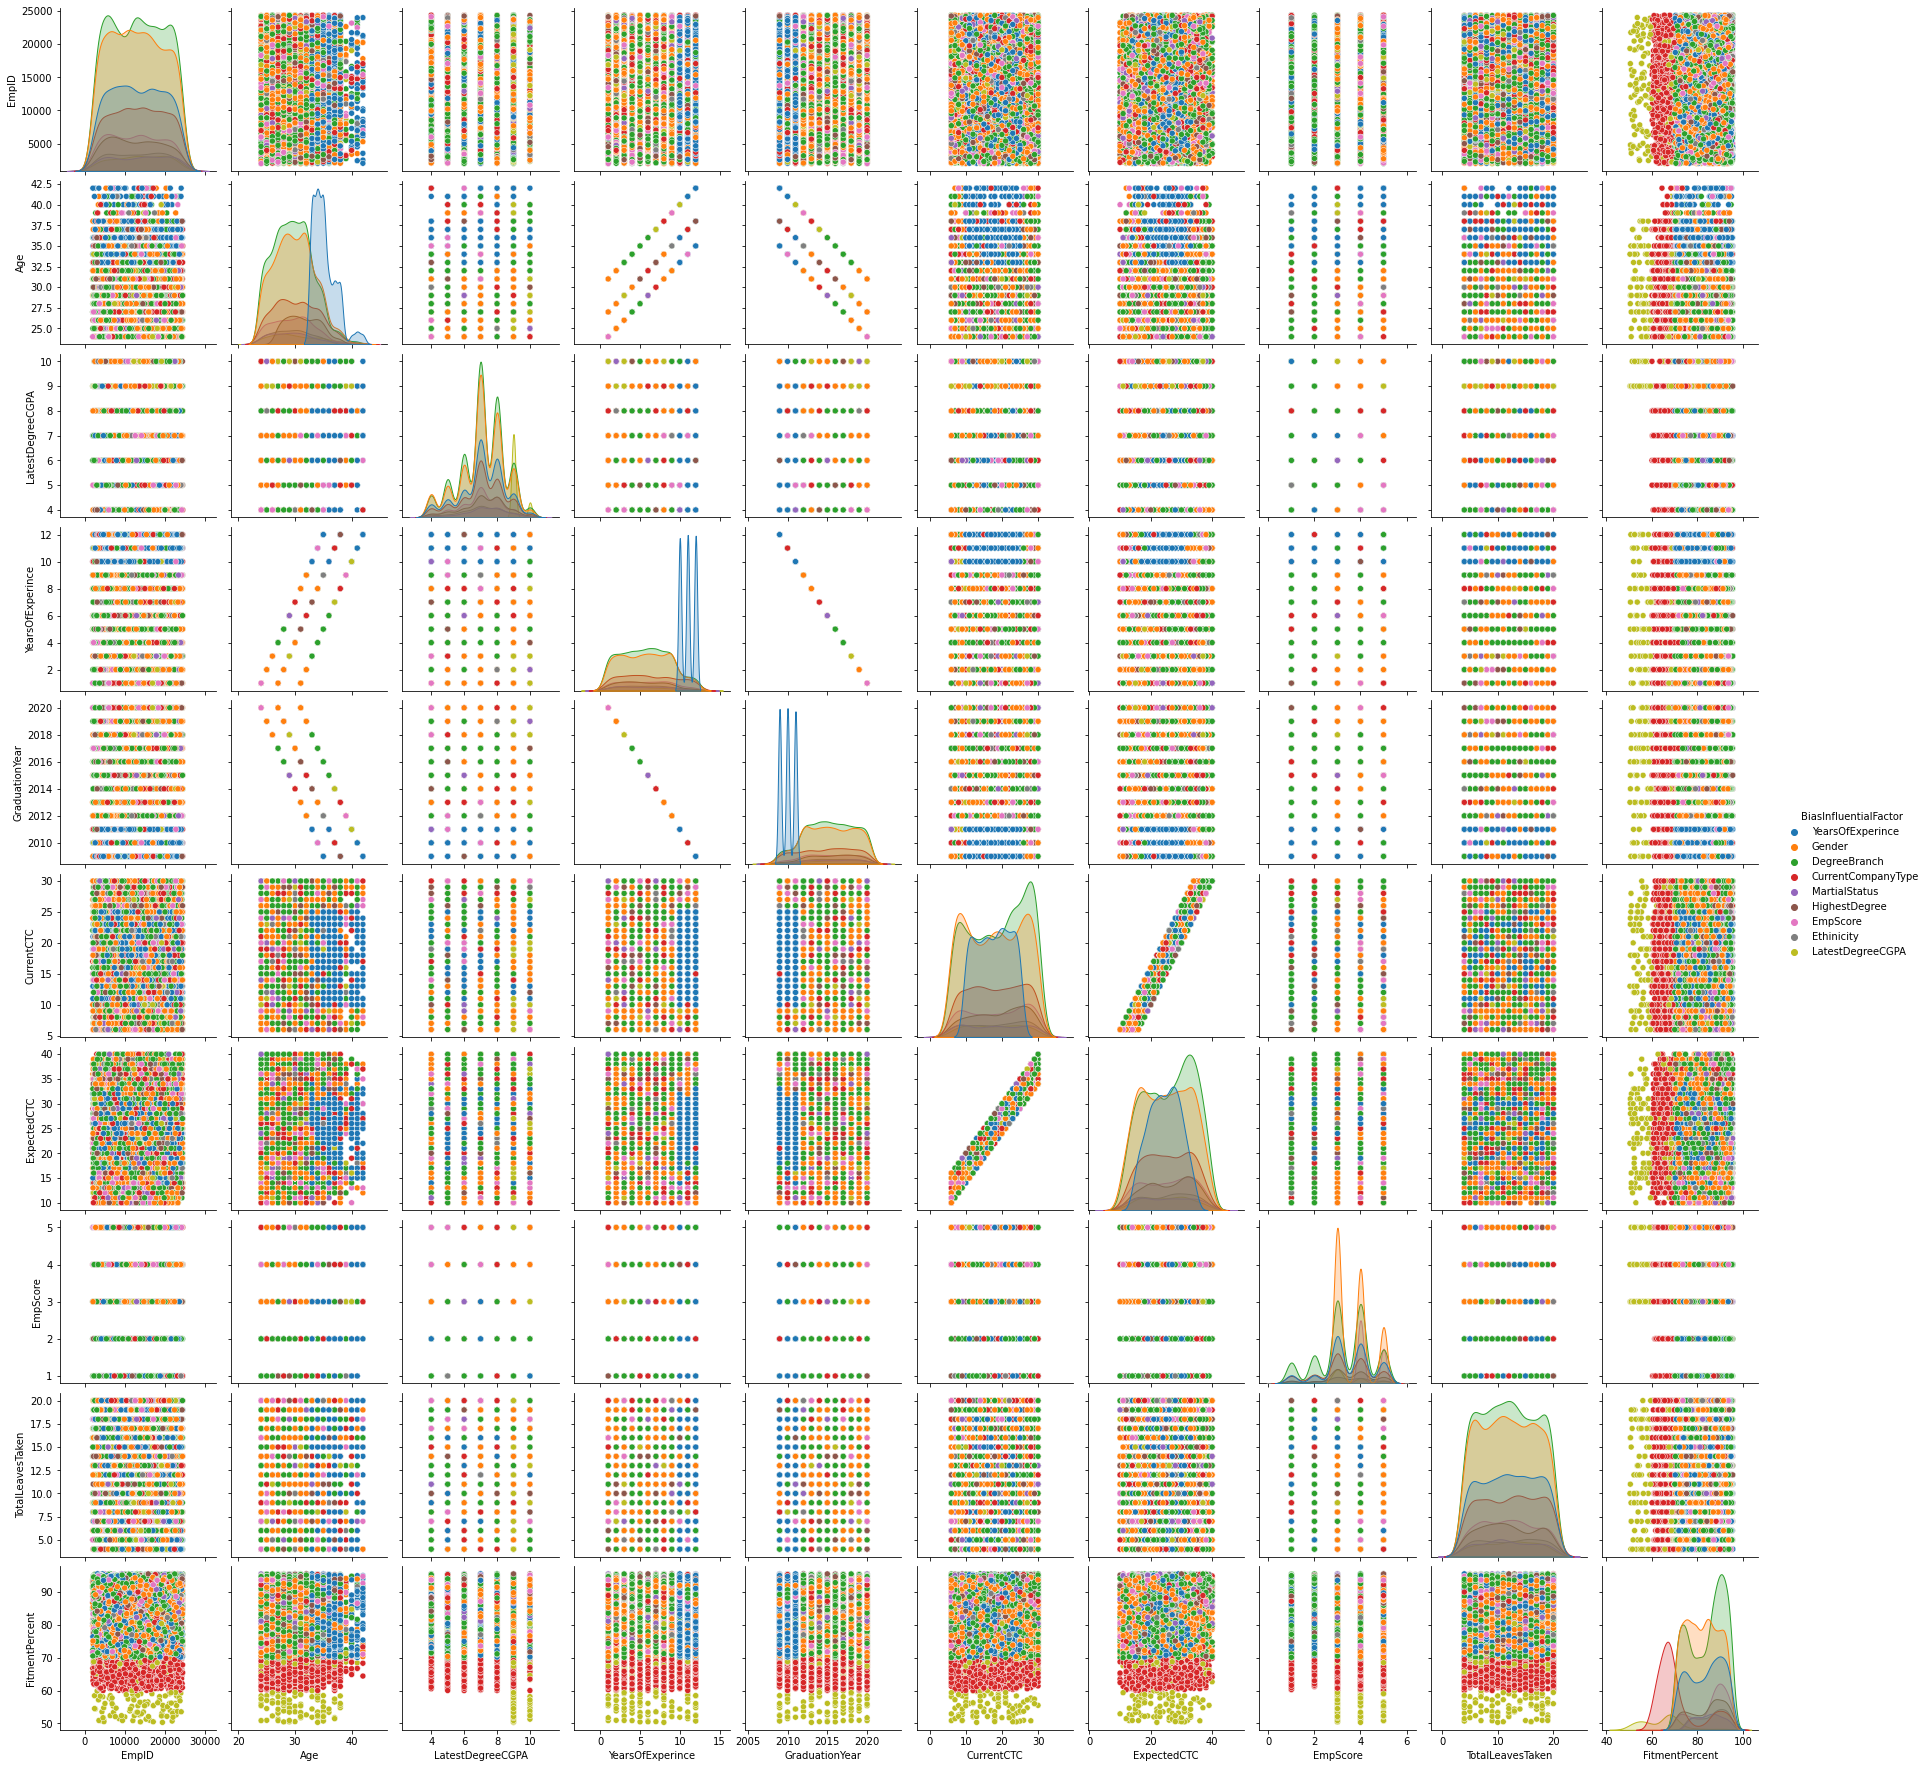

In [8]:
sns.pairplot(train,hue="BiasInfluentialFactor")

In [9]:
train.corr()# Checking correlation

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent
EmpID,1.000000,-0.004372,0.010218,-0.001096,0.001096,0.003742,0.003873,-0.004535,-0.000949,-0.015999
Age,-0.004372,1.000000,-0.016065,0.879819,-0.879819,-0.002504,-0.002661,0.001010,0.002090,-0.014188
LatestDegreeCGPA,0.010218,-0.016065,1.000000,-0.017794,0.017794,-0.000750,0.000851,-0.005073,0.003413,0.011049
YearsOfExperince,-0.001096,0.879819,-0.017794,1.000000,-1.000000,-0.004947,-0.007795,-0.002773,0.001517,-0.008466
GraduationYear,0.001096,-0.879819,0.017794,-1.000000,1.000000,0.004947,0.007795,0.002773,-0.001517,0.008466
CurrentCTC,0.003742,-0.002504,-0.000750,-0.004947,0.004947,1.000000,0.963368,0.007050,-0.015754,0.139495
ExpectedCTC,0.003873,-0.002661,0.000851,-0.007795,0.007795,0.963368,1.000000,0.005020,-0.017024,0.133717
EmpScore,-0.004535,0.001010,-0.005073,-0.002773,0.002773,0.007050,0.005020,1.000000,0.008744,0.140494
TotalLeavesTaken,-0.000949,0.002090,0.003413,0.001517,-0.001517,-0.015754,-0.017024,0.008744,1.000000,-0.013438
FitmentPercent,-0.015999,-0.014188,0.011049,-0.008466,0.008466,0.139495,0.133717,0.140494,-0.013438,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [11]:
train.describe()

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent
count,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000
mean,13150.781239,30.691242,7.100257,6.547746,2014.452254,18.076951,25.061488,3.392085,11.967021,75.880093
std,6475.019626,3.881378,1.346539,3.426920,3.426920,7.208130,7.478119,1.044676,4.897836,14.894207
min,2001.000000,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000,33.530000
25%,7501.000000,28.000000,6.000000,4.000000,2012.000000,12.000000,19.000000,3.000000,8.000000,68.720000
50%,13173.000000,31.000000,7.000000,7.000000,2014.000000,18.000000,25.000000,3.000000,12.000000,78.110000
75%,18718.000000,34.000000,8.000000,9.000000,2017.000000,24.000000,31.000000,4.000000,16.000000,87.990000
max,24390.000000,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000,95.500000


In [12]:
train.nunique()

EmpID                      13645
EmpName                     1766
LanguageOfCommunication        3
Age                           19
Gender                         3
JobProfileIDApplyingFor        9
HighestDegree                  8
DegreeBranch                   6
GraduatingInstitute            3
LatestDegreeCGPA               7
YearsOfExperince              12
GraduationYear                12
CurrentCTC                    25
ExpectedCTC                   31
MartialStatus                  2
EmpScore                       5
CurrentDesignation             8
CurrentCompanyType             3
DepartmentInCompany            5
TotalLeavesTaken              17
BiasInfluentialFactor          9
FitmentPercent              4578
dtype: int64

In [13]:
cat_var=[feature for feature in train.columns if train[feature].dtypes=='O']
cat_var

['EmpName',
 'LanguageOfCommunication',
 'Gender',
 'JobProfileIDApplyingFor',
 'HighestDegree',
 'DegreeBranch',
 'GraduatingInstitute',
 'MartialStatus',
 'CurrentDesignation',
 'CurrentCompanyType',
 'DepartmentInCompany',
 'BiasInfluentialFactor']

In [14]:
num_var=['EmpID','Age','LatestDegreeCGPA','YearsOfExperince','GraduationYear','CurrentCTC','ExpectedCTC','EmpScore','TotalLeavesTaken','FitmentPercent']

## Case 1: Predicting BiasInfluentialFactor feature

In [15]:
train1=train.copy()
test1=test.copy()

In [16]:
target=train1['FitmentPercent']

In [17]:
#train1.drop(['FitmentPercent'],inplace =True,axis=1)

In [18]:
train1=train1.iloc[:,2:]

#### Here i have split train data into two parts,one which does not have NAN value in BiasInfluentialFactor column and other part which have NAN value . 

In [19]:
train1.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [20]:
train2=train1[train1['BiasInfluentialFactor'].isna()]

In [21]:
target2=train2['FitmentPercent']

In [22]:
train2.drop(['BiasInfluentialFactor','FitmentPercent'],inplace =True,axis=1)
train2.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
1,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6
10,Hindi,29,Male,JR85289,B.Tech,Artificial Intelligence,Tier 1,7,6,2015,9,16,Married,3,EM,Enterprise,Finance,6
13,Hindi,27,Male,JR85289,B.Tech,Computer Science,Tier 1,5,4,2017,17,26,Married,2,EM,Enterprise,Engineering,20
17,English,34,Male,JR81165,M.Tech,Electrical,Tier 2,7,8,2013,12,18,Married,5,SSE,Enterprise,Design,16
22,Native,34,Male,JR87525,B.Tech,Electronics,Tier 1,7,11,2010,9,15,Married,3,SSE,Enterprise,Finance,18


In [23]:
train3=train1[train1['BiasInfluentialFactor'].notna()]

In [24]:
target3=train3['FitmentPercent']

In [25]:
train3.drop(['FitmentPercent'],inplace =True,axis=1)# dropping the last column
train3.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor
0,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince
2,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19,Gender
3,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender
4,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch
5,Native,35,Male,JR88879,BCA,Computer Science,Tier 2,9,12,2009,25,29,Married,4,DS,MidSized,Engineering,10,YearsOfExperince


In [26]:
train['EmpName'].isin(train['BiasInfluentialFactor']).sum()

0

In [27]:
train3['BiasInfluentialFactor'].unique()

array(['YearsOfExperince', 'Gender', 'DegreeBranch', 'CurrentCompanyType',
       'MartialStatus', 'HighestDegree', 'EmpScore', 'Ethinicity',
       'LatestDegreeCGPA'], dtype=object)

In [28]:
test1.drop(columns=['EmpID','EmpName'],axis=1,inplace=True)# we don't need these column for prediction

In [29]:
cat_var=['LanguageOfCommunication','Gender',
 'JobProfileIDApplyingFor',
 'HighestDegree',
 'DegreeBranch',
 'GraduatingInstitute',
 'MartialStatus',
 'CurrentDesignation',
 'CurrentCompanyType',
 'DepartmentInCompany']

## Label encoding on data with 'object' datatye


In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_var:
    train3[i] = le.fit_transform(train3[i])
    test1[i] = le.fit_transform(test1[i])
    train2[i] = le.fit_transform(train2[i])

Label encode target variable because target variable have 9 categories

In [31]:
train3['BiasInfluentialFactor']=le.fit_transform(train3['BiasInfluentialFactor'])


In [32]:
train3.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor
0,0,35,1,3,0,2,0,7,12,2009,21,26,0,5,7,0,1,20,8
2,0,36,0,4,7,1,0,6,6,2015,15,24,1,5,5,1,2,19,4
3,0,29,0,4,1,5,1,5,6,2015,16,24,0,5,5,2,4,16,4
4,0,25,1,0,2,1,2,8,2,2019,24,32,0,5,5,0,2,10,1
5,2,35,1,7,1,1,1,9,12,2009,25,29,0,4,3,1,2,10,8


In [33]:
train2.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
1,0,26,1,4,0,0,2,7,3,2018,15,19,0,5,0,1,2,6
10,1,29,1,3,0,0,0,7,6,2015,9,16,0,3,4,0,3,6
13,1,27,1,3,0,1,0,5,4,2017,17,26,0,2,4,0,2,20
17,0,34,1,2,4,2,1,7,8,2013,12,18,0,5,7,0,1,16
22,2,34,1,4,0,4,0,7,11,2010,9,15,0,3,7,0,3,18


In [34]:
test1.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,2,35,1,3,7,5,1,5,5,2016,27,34,1,4,5,0,3,18
1,0,35,1,3,0,5,2,9,12,2009,29,33,0,4,4,0,2,8
2,0,28,1,4,4,0,1,9,2,2019,18,25,0,3,5,2,2,18
3,1,37,1,4,6,1,1,8,11,2010,7,12,1,5,3,0,4,17
4,1,36,0,3,7,0,1,7,6,2015,22,32,0,4,5,2,2,9


In [35]:
col=['LanguageOfCommunication', 'Age', 'Gender', 'JobProfileIDApplyingFor',
       'HighestDegree', 'DegreeBranch', 'GraduatingInstitute',
       'LatestDegreeCGPA', 'YearsOfExperince', 'GraduationYear', 'CurrentCTC',
       'ExpectedCTC', 'MartialStatus', 'EmpScore', 'CurrentDesignation',
       'CurrentCompanyType', 'DepartmentInCompany', 'TotalLeavesTaken']

## Feature scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
from warnings import filterwarnings
filterwarnings('ignore')

scaler = MinMaxScaler()
train3[col] = scaler.fit_transform(train3[col])
train2[col] = scaler.fit_transform(train2[col])
test1[col] = scaler.fit_transform(test1[col])

train3.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor
0,0.0,0.611111,0.5,0.375,0.000000,0.4,0.0,0.500000,1.000000,0.000000,0.625000,0.533333,0.0,1.00,1.000000,0.0,0.25,1.0000,8
2,0.0,0.666667,0.0,0.500,1.000000,0.2,0.0,0.333333,0.454545,0.545455,0.375000,0.466667,1.0,1.00,0.714286,0.5,0.50,0.9375,4
3,0.0,0.277778,0.0,0.500,0.142857,1.0,0.5,0.166667,0.454545,0.545455,0.416667,0.466667,0.0,1.00,0.714286,1.0,1.00,0.7500,4
4,0.0,0.055556,0.5,0.000,0.285714,0.2,1.0,0.666667,0.090909,0.909091,0.750000,0.733333,0.0,1.00,0.714286,0.0,0.50,0.3750,1
5,1.0,0.611111,0.5,0.875,0.142857,0.2,0.5,0.833333,1.000000,0.000000,0.791667,0.633333,0.0,0.75,0.428571,0.5,0.50,0.3750,8


In [37]:
train2.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
1,0.0,0.111111,0.5,0.500,0.000000,0.0,1.0,0.500000,0.181818,0.818182,0.375000,0.300000,0.0,1.00,0.000000,0.5,0.50,0.125
10,0.5,0.277778,0.5,0.375,0.000000,0.0,0.0,0.500000,0.454545,0.545455,0.125000,0.200000,0.0,0.50,0.571429,0.0,0.75,0.125
13,0.5,0.166667,0.5,0.375,0.000000,0.2,0.0,0.166667,0.272727,0.727273,0.458333,0.533333,0.0,0.25,0.571429,0.0,0.50,1.000
17,0.0,0.555556,0.5,0.250,0.571429,0.4,0.5,0.500000,0.636364,0.363636,0.250000,0.266667,0.0,1.00,1.000000,0.0,0.25,0.750
22,1.0,0.555556,0.5,0.500,0.000000,0.8,0.0,0.500000,0.909091,0.090909,0.125000,0.166667,0.0,0.50,1.000000,0.0,0.75,0.875


## Data splitting for classification
- I have used GridSearchCV because dataset have less record around 10K

In [38]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split

In [39]:
X=train3.drop(['BiasInfluentialFactor'],axis=1)
y=train3['BiasInfluentialFactor']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### Model evaluation and Prediction

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=5, n_estimators=9)

In [41]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8452288595810706


In [42]:
pred=clf.predict(train2)

In [43]:
train2['BiasInfluentialFactor']=pred

In [45]:
#test1['BiasInfluentialFactor']=pred2

In [46]:
train3['FitmentPercent']=target3

In [47]:
train2['FitmentPercent']=target2

### after predicting the null values in train2 dataset i have joined both train3 and train2 to make a combine train dataset for prediction of test dataset BiasInfluentialFactor column

In [48]:
combine_train=pd.concat([train3,train2],sort=False,ignore_index=True,axis=0)

In [49]:
combine_train.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,0.0,0.611111,0.5,0.375,0.000000,0.4,0.0,0.500000,1.000000,0.000000,0.625000,0.533333,0.0,1.00,1.000000,0.0,0.25,1.0000,8,95.40
1,0.0,0.666667,0.0,0.500,1.000000,0.2,0.0,0.333333,0.454545,0.545455,0.375000,0.466667,1.0,1.00,0.714286,0.5,0.50,0.9375,4,91.26
2,0.0,0.277778,0.0,0.500,0.142857,1.0,0.5,0.166667,0.454545,0.545455,0.416667,0.466667,0.0,1.00,0.714286,1.0,1.00,0.7500,4,72.29
3,0.0,0.055556,0.5,0.000,0.285714,0.2,1.0,0.666667,0.090909,0.909091,0.750000,0.733333,0.0,1.00,0.714286,0.0,0.50,0.3750,1,86.34
4,1.0,0.611111,0.5,0.875,0.142857,0.2,0.5,0.833333,1.000000,0.000000,0.791667,0.633333,0.0,0.75,0.428571,0.5,0.50,0.3750,8,93.23


In [51]:
combine_train.shape

(13645, 20)

In [52]:
tr_target=combine_train['FitmentPercent']

In [53]:
test1.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,1.0,0.611111,0.5,0.375,1.000000,1.0,0.5,0.166667,0.363636,0.636364,0.875000,0.800000,1.0,0.75,0.714286,0.0,0.75,0.8750
1,0.0,0.611111,0.5,0.375,0.000000,1.0,1.0,0.833333,1.000000,0.000000,0.958333,0.766667,0.0,0.75,0.571429,0.0,0.50,0.2500
2,0.0,0.222222,0.5,0.500,0.571429,0.0,0.5,0.833333,0.090909,0.909091,0.500000,0.500000,0.0,0.50,0.714286,1.0,0.50,0.8750
3,0.5,0.722222,0.5,0.500,0.857143,0.2,0.5,0.666667,0.909091,0.090909,0.041667,0.066667,1.0,1.00,0.428571,0.0,1.00,0.8125
4,0.5,0.666667,0.0,0.375,1.000000,0.0,0.5,0.500000,0.454545,0.545455,0.666667,0.733333,0.0,0.75,0.714286,1.0,0.50,0.3125


In [54]:
X=combine_train.drop(['BiasInfluentialFactor','FitmentPercent'],axis=1)
y=combine_train['BiasInfluentialFactor']
X_tr, X_tes, y_tr, y_tes = train_test_split(X, y, random_state=0)


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

Accuracy of the GBM on test set: 0.872
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       617
           1       0.89      0.90      0.89       977
           2       0.79      0.99      0.88       198
           3       0.54      0.20      0.29       102
           4       0.92      0.99      0.96       717
           5       0.89      0.98      0.93       161
           6       0.76      0.18      0.29        72
           7       0.73      0.38      0.50        92
           8       0.89      0.98      0.93       476

    accuracy                           0.87      3412
   macro avg       0.81      0.71      0.72      3412
weighted avg       0.86      0.87      0.86      3412



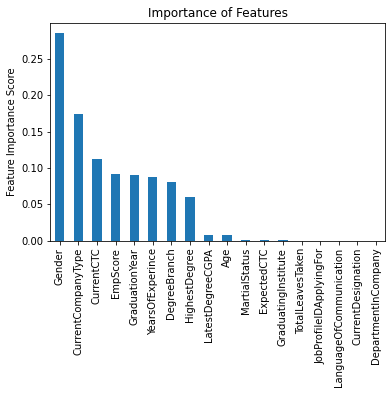

In [58]:
new=GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, random_state=0)
new.fit(X_tr,y_tr)
predictors=list(X_tr)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_tes, y_tes)))
pred=new.predict(X_tes)
print(classification_report(y_tes, pred))

after seeing above result most important features are   Gender,CurrentCompanyType,CurrentCTC,YearsOfExperince,EmpScore,GraduationYear,DegreeBranch,HighestDegree.we will train our regression model based on these independent features

In [59]:
pred2=new.predict(test1)## predicting on test dataset

In [60]:
combine_train.columns

Index(['LanguageOfCommunication', 'Age', 'Gender', 'JobProfileIDApplyingFor',
       'HighestDegree', 'DegreeBranch', 'GraduatingInstitute',
       'LatestDegreeCGPA', 'YearsOfExperince', 'GraduationYear', 'CurrentCTC',
       'ExpectedCTC', 'MartialStatus', 'EmpScore', 'CurrentDesignation',
       'CurrentCompanyType', 'DepartmentInCompany', 'TotalLeavesTaken',
       'BiasInfluentialFactor', 'FitmentPercent'],
      dtype='object')

In [64]:
cl=['Gender','HighestDegree','DegreeBranch','YearsOfExperince','GraduationYear','CurrentCTC','EmpScore','CurrentCompanyType']

In [116]:
c1=combine_train[['Gender','HighestDegree','DegreeBranch','YearsOfExperince','GraduationYear','CurrentCTC','EmpScore','CurrentCompanyType','FitmentPercent']]

In [119]:
test1[cl].head()

,Gender,HighestDegree,DegreeBranch,YearsOfExperince,GraduationYear,CurrentCTC,EmpScore,CurrentCompanyType
0,0.5,1.000000,1.0,0.363636,0.636364,0.875000,0.75,0.0
1,0.5,0.000000,1.0,1.000000,0.000000,0.958333,0.75,0.0
2,0.5,0.571429,0.0,0.090909,0.909091,0.500000,0.50,1.0
3,0.5,0.857143,0.2,0.909091,0.090909,0.041667,1.00,0.0
4,0.0,1.000000,0.0,0.454545,0.545455,0.666667,0.75,1.0


In [127]:
from sklearn.model_selection import train_test_split
X1=c1[cl]
y1 = c1['FitmentPercent']
#X1, y1 = make_regression(random_state=0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=0)

## case 2 : Making regression

In [130]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor( loss = 'huber',learning_rate=0.07,n_estimators=350, max_depth=6,subsample=1,verbose=False)
gbr.fit(X_train1,y_train1)

from sklearn.model_selection import cross_val_score
GB_accuracies = cross_val_score(estimator = gbr, X = X_train1,y=y_train1,cv= 10)

print("Mean_GB_Acc : ", GB_accuracies.mean())

Mean_GB_Acc :  0.5886433832888125


In [131]:
import sklearn.metrics as metrics
final_pre=gbr.predict(X_test1)
metrics.r2_score(y_test1,final_pre)

0.5780347883880104

In [132]:
testls=test1[cl]


In [134]:
final_pred2=gbr.predict(testls)

In [135]:
final_pred2

array([91.18184408, 89.2395303 , 81.42492381, ..., 79.31698816,
       59.14908583, 60.99560282])

In [136]:
test['EmpID']

0        5664
1       23568
2       21490
3        8363
4        6165
        ...  
8740    14758
8741    23544
8742    16175
8743    18458
8744    10036
Name: EmpID, Length: 8745, dtype: int64

In [138]:
#new_ls = lb.fit_transform(ls)
lab=le.inverse_transform(pred2)# inverse labelencoding on BiasInfluentialFactor feature of predicted test data

In [139]:
output = pd.DataFrame({ 'EmpID' : test['EmpID'], 'BiasInfluentialFactor': lab,'FitmentPercent':final_pred2 })
output

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,CurrentCompanyType,91.181844
1,23568,DegreeBranch,89.239530
2,21490,MartialStatus,81.424924
3,8363,CurrentCompanyType,51.312081
4,6165,Gender,83.919609
...,...,...,...
8740,14758,Gender,79.063177
8741,23544,HighestDegree,81.275249
8742,16175,DegreeBranch,79.316988
8743,18458,CurrentCompanyType,59.149086


In [140]:
output.to_csv('sample submission.csv', index = False)